#### Linear Regression Model

In [53]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Dataset

In [54]:
df=pd.read_csv('../Kumar Gaurav - 15 May/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Fetching Column Name

In [55]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#### Extracting numerical values from the dataset for linear regression

In [56]:
finaldf=df[[ 'Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
finaldf.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Checking correlation between features using heatmap

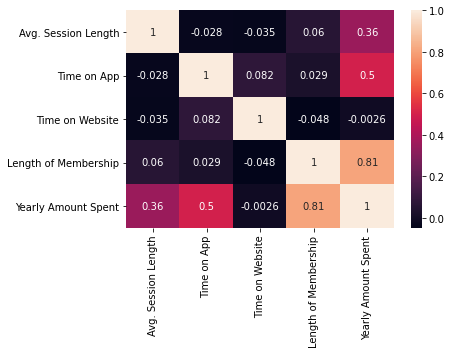

In [57]:
sns.heatmap(finaldf.corr(),annot=True)
plt.show()

#### Checking null value in dataset

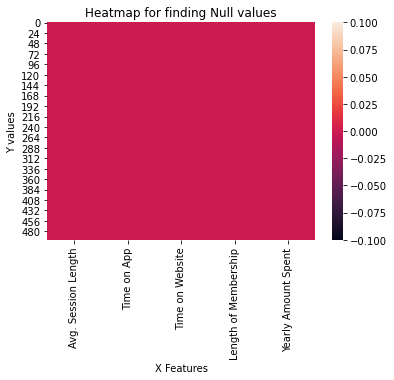

In [58]:
sns.heatmap(finaldf.isnull())
plt.title('Heatmap for finding Null values')
plt.xlabel('X Features')
plt.ylabel('Y values')
plt.show()

#### Selecting train test split function

In [59]:
from sklearn.model_selection import train_test_split

#### Splitting dataset into x and y

In [60]:
x=finaldf.iloc[:,0:4]
y=finaldf.iloc[:,4:]

#### Univarient Analysis

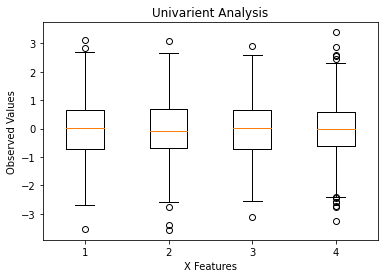

In [79]:
plt.boxplot(x)
#plt.figure(figsize=(10,6))
plt.title('Univarient Analysis')
plt.xlabel('X Features')
plt.ylabel('Observed Values')
plt.show()

#### Scaling data through standard scaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#### fitting and transforming x data

In [63]:
x=scaler.fit_transform(x)

#### importing linear regression model from sklearn

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#### Splitting x and y into train and test set

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

#### fitting model

In [66]:
model.fit(x_train,y_train)

LinearRegression()

#### predicting through model

In [67]:
y_pred=model.predict(x_test)

#### checking the error between actual test set and predicting set

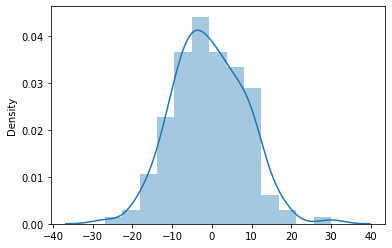

In [80]:
sns.distplot(y_test-y_pred)
plt.show()

#### It's having bell curve

#### Checking linearity from scatter plot

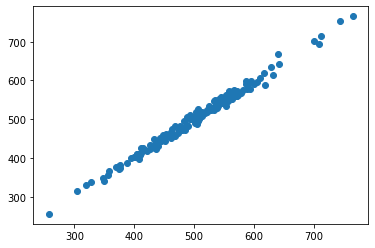

In [81]:
plt.scatter(y_test,y_pred)
plt.show()

#### Metrics selection for various error functions

In [70]:
from sklearn import metrics

#### Values of different metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:',metrics.r2_score(y_test,y_pred))

MAE: 7.228148653430835
MSE: 79.81305165097451
RMSE: 8.933815066978637
R2_Score: 0.9890046246741234


#### Checking error from Lasso model

In [72]:
from sklearn import linear_model

In [73]:
clf = linear_model.Lasso(alpha=0.1)
clf

Lasso(alpha=0.1)

In [74]:
clf.fit(x_train,y_train)

Lasso(alpha=0.1)

In [75]:
y_pred_Lasso=clf.predict(x_test)

In [76]:
metrics.r2_score(y_test,y_pred_Lasso)*100

98.89564731130308

#### The difference between Linear model and Lasso model is very minute 

In [77]:
((metrics.r2_score(y_test,y_pred))-(metrics.r2_score(y_test,y_pred_Lasso)))*100

0.004815156109261309

#### which is very minut

#### Thanks for watching